# Numba

Numba is a Just-in-time compiler for python, i.e. whenever you make a call to a python function all or part of your code is converted to machine code “just-in-time” of execution, and it will then run on your native machine code speed! It is sponsored by Anaconda Inc and has been/is supported by many other organisations.


# Why Numba

When there are many other compilers like cython, or any other similar compilers or something like pypy.

For a simple reason that here you don’t have to leave the comfort zone of writing your code in python. Yes, you read it right, you don’t have to change your code at all for basic speedup which is comparable to speedup you get from similar cython code with type definitions.

You just have to add a familiar python functionality, a decorator (a wrapper) around your functions. A wrapper for a class is also under development.

# How does numba work

Numba generates optimized machine code from pure Python code using LLVM compiler infrastructure. Speed of code run using numba is comparable to that of similar code in C, C++ or Fortran.
First, Python function is taken, optimized and is converted into Numba’s intermediate representation, then after type inference which is like Numpy’s type inference (so python float is a float64), it is converted into LLVM interpretable code. This code is then fed to LLVM’s just-in-time compiler to give out machine code.

You can generate code at runtime or import time on CPU (default) or GPU, as you prefer it.

In [3]:
#pip install numba

In [2]:
import os
import numpy as np # Numba supports many functions from numpy (https://numba.pydata.org/numba-doc/dev/reference/numpysupported.html)
from numba import jit, njit, vectorize, cuda
import math # Numba supports many functions from math (http://numba.pydata.org/numba-doc/0.17.0/reference/pysupported.html)

import matplotlib.pyplot as plt

In [3]:
a = np.ones((1, 100), dtype=np.float64)
b = np.ones((100, 1), dtype=np.float64)

In [4]:
#
# Simple Python function
#
def func(a, b):
    for i in range(100000):
        constant = math.pow((a@b)[0][0], 1./2)/math.exp((a@b)[0][0]/1000)
        a = np.array([[constant]*100], dtype=np.float64)
    return a

In [5]:
%timeit res = func(a, b)

1.88 s ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
from numba import jit
@jit
def function(x):
    # your loop or numerically intensive computations
    return x

In [9]:
#
# Basic Numba compiler with type information provided
#
import math
@jit(nopython=True)
def jit_func(a, b):
    for i in range(100000):
        constant = math.pow((a@b)[0][0], 1./2)/math.exp((a@b)[0][0]/1000)
        a = np.array([[constant]*100], dtype=np.float64)
    return a

In [10]:
%timeit res = jit_func(a, b)

232 ms ± 4.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\Pranay\AppData\Local\Temp\ipykernel_3388\1945444198.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["pyFunc", "Jit", "Njit"])


Text(0.5, 0, 'Method')

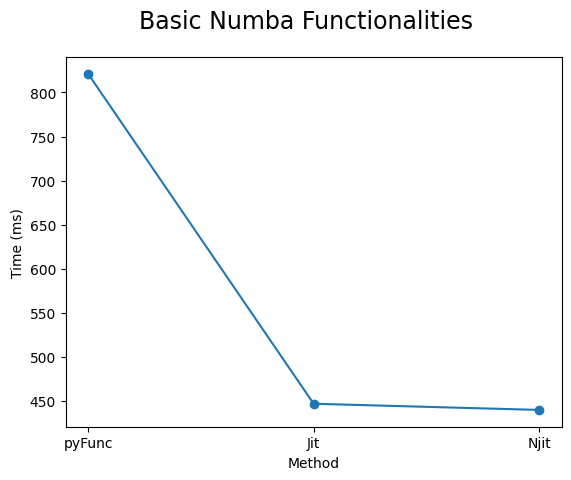

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(["a", "b", "c"], [821, 447, 440], "-o") # Results without caching
ax.set_xticklabels(["pyFunc", "Jit", "Njit"])
fig.suptitle("Basic Numba Functionalities", fontsize=17)
ax.set_ylabel("Time (ms)")
ax.set_xlabel("Method")

In [19]:
@vectorize
def vec_func(a, b):
  # Now we can pass arrays too, and operate
  # inside like they are scalars:
    for i in range(100000):
        a = math.pow(a*b, 1./2)/math.exp(a*b/1000)
    return a

In [20]:
%timeit res = vec_func(a, b)

1min 4s ± 369 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
#
# This is slow because previously we were doing some
# operations on 1,00,000 scalars obtained by multiplying
# (a@b), but now we are multiplying individual elements 
# of a and b for 1,00,000 times. Also numba is taking care
# of broadcasting too. So, in this case we are applying this
# loop for 100 times.
#
res.shape # Previously it was (1, 100)

NameError: name 'res' is not defined

In [ ]:
@vectorize(['float64(float64, float64)'], target='parallel')
def vecParallel_func(a, b):
    for i in range(100000):
        a = math.pow(a*b, 1./2)/math.exp(a*b/1000)
    return a